##Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
pd.set_option('display.max_columns', None)
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_predict
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, auc, recall_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data

In [ ]:
# Reading the dataset
data = pd.read_csv('/sentiment_tweets3.csv')

In [ ]:
data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
# Renaming two columns for clarity
data.rename(columns={'message to examine': 'message', 'label (depression result)': 'label'}, inplace=True)

In [ ]:
data

,Index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
# Selecting relevant columns
data1 = data[['message', 'label']]
data1

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
# Drop any rows with missing values (NaN)
data1.dropna(inplace=True)

## Text preprocessing

In [ ]:
# Lowercasing, removing punctuation and numbers
data1['message'] = data1['message'].apply(lambda x: ' '.join(word.lower() for word in word_tokenize(x) if word.isalpha()))


In [ ]:
stop_words = stopwords.words('english')

In [ ]:
# Stopwords removals
data1['message'] = data1['message'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() #Create an instance of the PorterStemmer class. Stemming is a text normalization process that reduces words to their base or root form.
data1['message'] = data1['message'].apply(lambda x: ' '.join(stemmer.stem(word) for word in word_tokenize(x)))

# Apply a lambda function to each element in the 'message' column.
#The lambda function tokenizes each sentence into words using word_tokenize, and then applies stemming to each word using stemmer.stem(word).
#Finally, the stemmed words are joined back into a sentence using ' '.join(...). The result is a DataFrame with the 'message' column containing the stemmed version of each sentence.


# KFOLD cross validation

In [ ]:
# Separating features and labels
# Set 'X' as the 'message' column and 'y' as the 'label' column
X = data1['message']
y = data1['label']

In [ ]:
# Check the class distribution : --> imbalanced data
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
0    8000
1    2314
Name: label, dtype: int64


In [ ]:
#y_train_val.unique()

array([0, 1])

In [ ]:
from sklearn.utils import shuffle
#Trying KFOLDS : to separate out into 3 folds, each has train and test sets
kf = KFold(shuffle=True, random_state=7218, n_splits =3)

In [ ]:
#type(kf.split(X_train_val))

generator

In [ ]:
# display 10 values of the indexes of the 3 folds
#for train_index, val_index in kf.split(X_train_val):
#  print("train index =", train_index[:10], len(train_index))
#  print("validation index =", val_index[:10], len(val_index))
#  #print("test index =", test_index[:10], len(test_index))
#  print(' ')


train index = [ 1  2  4  5  6  7  9 10 11 14] 3438
validation index = [ 0  3  8 12 13 15 16 17 23 26] 1719
 
train index = [ 0  1  2  3  4  7  8 10 11 12] 3438
validation index = [ 5  6  9 18 20 21 22 27 28 31] 1719
 
train index = [ 0  3  5  6  8  9 12 13 15 16] 3438
validation index = [ 1  2  4  7 10 11 14 19 24 25] 1719
 


# GloVe for Feature Engineering / Text Representation

convert words into **vector representations** = **word embeddings**

In [ ]:
# Define the path to the GloVe file containing pre-trained word vectors (must be downloaded from GloVe website)
glove_file = '/glove/glove.6B.100d.txt'

In [ ]:
# Read and store word vectors from the GloVe file
# Create an empty dictionary to store word vectors from the GloVe file
glove_vectors = {}
# Open the GloVe file, read each line, and store word vectors in the dictionary
try:
  with open(glove_file, 'r', encoding='utf-8') as file:
      for line in file:
          values = line.split()       #Splits each line into a list of strings using whitespace as the default separator.
                                      #The line represents a word followed by its corresponding vector values in the file.
          word = values[0]                            #Retrieves the first element from the values list, which is the word itself
          vector = np.array(values[1:], dtype='float32') # [float(val) for val in values[1:]]               #Constructs a list comprehension to convert the string values in values[1:] (excluding the first element which is the word) to floating-point numbers (floats). These are the components of the word's vector representation
          glove_vectors[word] = vector                 #Assigns the word as the key and its associated vector (a list of float values) as the value in the glove_vectors dictionary
except FileNotFoundError:
    print(f"File {glove_file} not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [ ]:
# define a function to convert our text data to GloVe word embeddings
# vectorization
def text_to_embeddings(text, word_vectors, embedding_dim=100):  #size of the vectors (vectors == embeddings)
    embeddings = [word_vectors.get(word, np.zeros(embedding_dim)) for word in word_tokenize(text)]

    if not embeddings:
        return np.zeros(embedding_dim)

    return np.mean(embeddings, axis=0)
    # Taking the mean of word embeddings is a simple way to aggregate information from all the words in the text into a single vector. This mean vector captures the overall semantic content of the text.

## Train & validation :
Scaling our data

Define our classifier

##using kernel="Linear"

accuracy_scores
[0.9365910413030832, 0.9435718440954043, 0.9397905759162304]
precision_scores
[0.9413576862498729, 0.946870626192644, 0.9450318401083384]
f1
[0.9696794298434422, 0.9735248433258266, 0.9717414168191142]
conf_matrix_kfold 
 [[7543  457]
 [ 162 2152]]


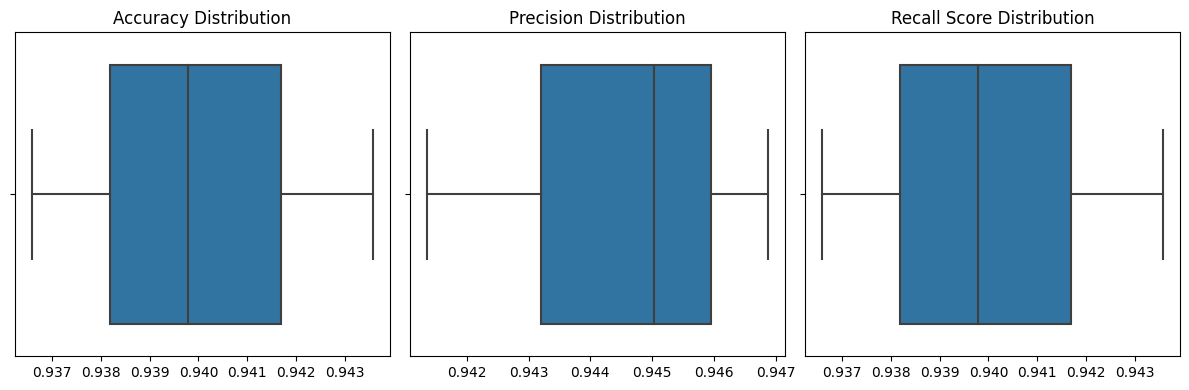

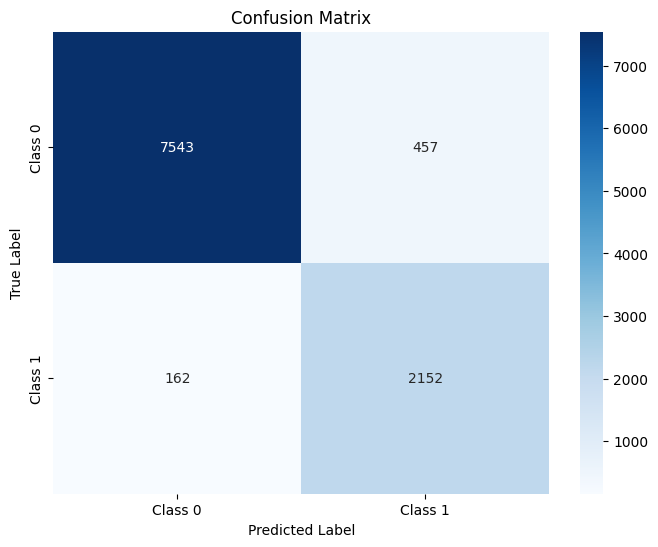

In [ ]:
# Lists to store results from each fold
accuracy_scores=[]
precision_scores=[]
recall_scores=[]

# Lists to store true and predicted labels for confusion matrix
all_y_true = []
all_y_pred = []
conf_matrix =[]

# Standardizing and using SVM classifier
s = StandardScaler()
svm_classifier = SVC(kernel='linear')

# For each fold, split our X into train & validation
for train_index, val_index in kf.split(X):

  # split our X switch the indexes
  X_train, X_val, y_train, y_val =(X[train_index], X[val_index], y[train_index], y[val_index])

  # Apply our defined function : "text_to_embeddings" to x_train & x_val
  X_train_embedded = np.array([text_to_embeddings(text, glove_vectors) for text in X_train])
  X_val_embedded = np.array([text_to_embeddings(text, glove_vectors) for text in X_val])

  # Using RandomOverSampler to oversample the minority class
  oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_embedded, y_train)

  # Define our pipeline : scaling then, svm classifier
  estimator = Pipeline([('scale', s), ('svm', svm_classifier)])

  # Fit and then predict for each fold
  estimator.fit(X_train_resampled, y_train_resampled)
  y_pred = estimator.predict(X_val_embedded)

  accuracy_fold = accuracy_score(y_val, y_pred)
  accuracy_scores.append(accuracy_fold)

  precision_fold = precision_score(y_val, y_pred, average='weighted')
  precision_scores.append(precision_fold)

  # Calculate recall for the fold
  recall_fold = recall_score(y_val, y_pred, average='weighted')
  recall_scores.append(recall_fold)

  # Conf matrix : Append true and predicted labels to the lists
  all_y_true.extend(y_val)
  all_y_pred.extend(y_pred)

# Conf matrix : Generate the overall confusion matrix for k-fold cross-validation
conf_matrix_kfold = confusion_matrix(all_y_true, all_y_pred)
#true label being i-th class and predicted label being j-th class

print("accuracy_scores")
print(accuracy_scores)
print("precision_scores")
print(precision_scores)
print("f1")
print(f1)
print("conf_matrix_kfold \n", conf_matrix_kfold)

import matplotlib.pyplot as plt
import seaborn as sns
# Visualize metrics
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 3, 1)
sns.boxplot(x=accuracy_scores)
plt.title('Accuracy Distribution')

# Precision plot
plt.subplot(1, 3, 2)
sns.boxplot(x=precision_scores)
plt.title('Precision Distribution')

# recall Score plot
plt.subplot(1, 3, 3)
sns.boxplot(x=recall_scores)
plt.title('Recall Score Distribution')

plt.tight_layout()
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kfold, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##using kernel="rbf"

accuracy_scores
[0.9697498545666084, 0.9735311227457825, 0.9717859220477022]
precision_scores
[0.9696321455805595, 0.9735187980133926, 0.9717081236181063]
recall
[0.9697498545666084, 0.9735311227457825, 0.9717859220477022]
conf_matrix_kfold 
 [[7863  137]
 [ 155 2159]]


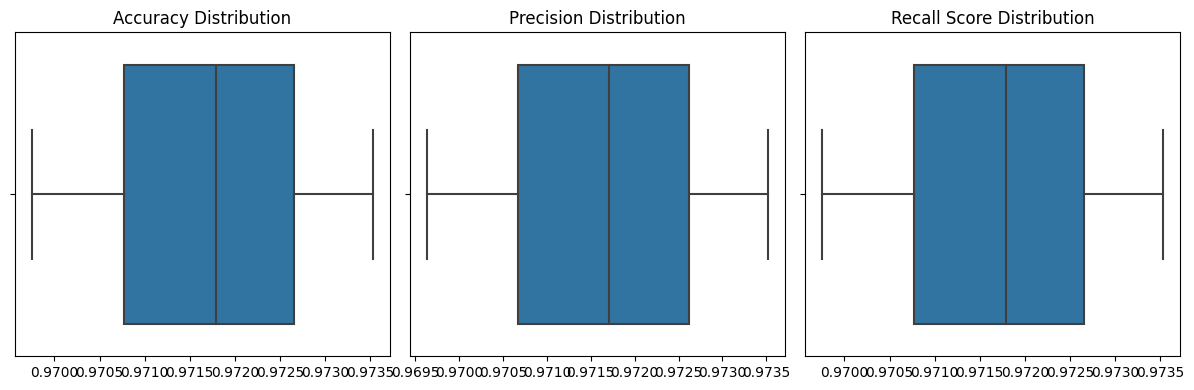

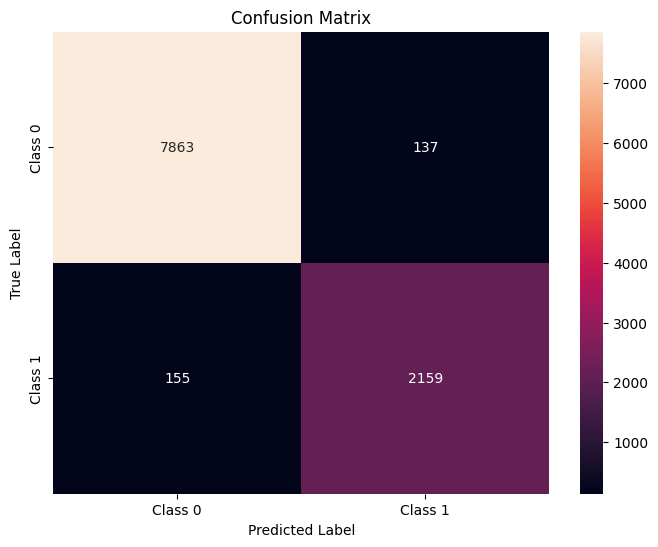

In [ ]:
# Lists to store results from each fold
accuracy_scores=[]
precision_scores=[]
recall_scores=[]

# Lists to store true and predicted labels for confusion matrix
all_y_true = []
all_y_pred = []
conf_matrix =[]

# Standardizing and using SVM classifier
s = StandardScaler()
svm_classifier = SVC(kernel='rbf')

# For each fold, split our X into train & validation
for train_index, val_index in kf.split(X):

  # split our X switch the indexes
  X_train, X_val, y_train, y_val =(X[train_index], X[val_index], y[train_index], y[val_index])

  # Apply our defined function : "text_to_embeddings" to x_train & x_val
  X_train_embedded = np.array([text_to_embeddings(text, glove_vectors) for text in X_train])
  X_val_embedded = np.array([text_to_embeddings(text, glove_vectors) for text in X_val])

  # Using RandomOverSampler to oversample the minority class
  oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_embedded, y_train)

  # Define our pipeline : scaling then, svm classifier
  estimator = Pipeline([('scale', s), ('svm', svm_classifier)])

  # Fit and then predict for each fold
  estimator.fit(X_train_resampled, y_train_resampled)
  y_pred = estimator.predict(X_val_embedded)

  accuracy_fold = accuracy_score(y_val, y_pred)
  accuracy_scores.append(accuracy_fold)

  # Calculate recall for the fold
  recall_fold = recall_score(y_val, y_pred, average='weighted')
  recall_scores.append(recall_fold)

  precision_fold = precision_score(y_val, y_pred, average='weighted')
  precision_scores.append(precision_fold)

  # Conf matrix : Append true and predicted labels to the lists
  all_y_true.extend(y_val)
  all_y_pred.extend(y_pred)

# Conf matrix : Generate the overall confusion matrix for k-fold cross-validation
conf_matrix_kfold = confusion_matrix(all_y_true, all_y_pred)
#true label being i-th class and predicted label being j-th class

print("accuracy_scores")
print(accuracy_scores)
print("precision_scores")
print(precision_scores)
print("recall")
print(recall_scores)
print("conf_matrix_kfold \n", conf_matrix_kfold)

# Visualize metrics
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 3, 1)
sns.boxplot(x=accuracy_scores)
plt.title('Accuracy Distribution')

# Precision plot
plt.subplot(1, 3, 2)
sns.boxplot(x=precision_scores)
plt.title('Precision Distribution')

# recall Score plot
plt.subplot(1, 3, 3)
sns.boxplot(x=recall_scores)
plt.title('Recall Score Distribution')

plt.tight_layout()
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kfold, annot=True, fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
